# 다양한 ocr 모델 비교하기
**"Google OCR API, keras-ocr, Tesseract를 사용해보는 프로젝트"**

#### 목차

- 검증용 데이터셋 준비
- Google OCR API, keras-ocr, Tesseract로 테스트 진행
- 회고
---

## 1. 검증용 데이터셋 준비

#### 모듈

In [10]:
import os
import glob
import pytesseract

import cv2
import matplotlib.pyplot as plt
from PIL import Image

import keras_ocr
from pytesseract import Output

#### 데이터 가져오기

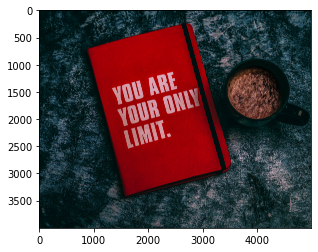

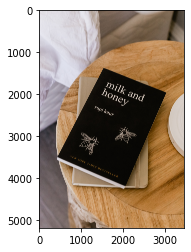

In [21]:
img_path1 = 'image/book1.jpg'
img_path2 = 'image/book2.jpg'

img_bgr = cv2.imread(img_path1)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

img_bgr = cv2.imread(img_path2)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [29]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [30]:
images = [keras_ocr.tools.read(path) for path in file_path]
prediction_groups = [pipeline.recognize({path}) for path in file_path]

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


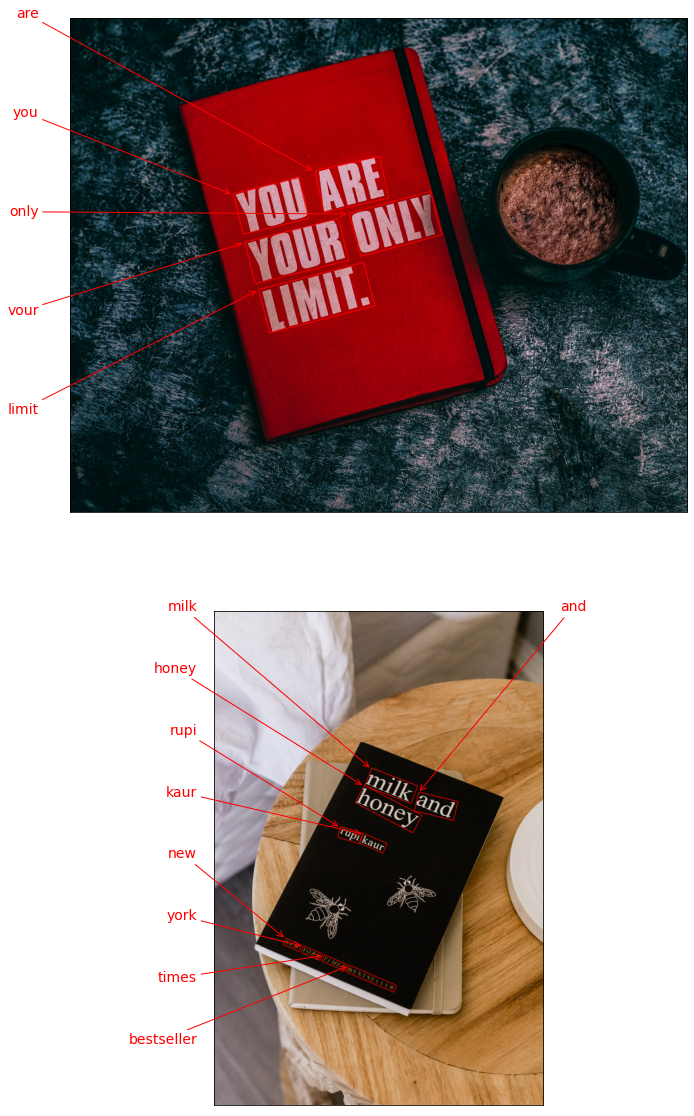

In [31]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)